<h1 style="text-align:center;"><a href="https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset">Dataset 1 (mobile)</a></h1>

Group Number: #127
<br>
Names: Alex Oprea, Kristen Duong
<br>
Student Numbers: 300230368, 300240425

# DESCRIPTION

<i>Dataset name:</i> Mobile Device Usage and User Behavior Dataset
<br>
<i>Author:</i> Vala Khorasani
<br>
<i>Purpose:</i> To understand patterns in current mobile device usage and gain insight into the extremes of daily phone usage, as well as how various phone models perform under these conditions.
<br>
<i>Domain:</i> Technology domain, centered around User Analytics.
<br>
<i>Audience:</i> Mobile phone companies that want to analyze their users’ consumption and behaviors and consumers that want to compare phone models and operating systems.
<br>
<i>Shape:</i> 700 rows, 11 columns

<i>Categorical Variables:</i> 
- Device Model: Text value representing the user’s phone model.
- Operating System: Text value representing the operating system of the phone (bivariate: Android or IOS).
- Gender: Text value representing the gender of the user (bivariate: male/female)
- User Behaviour: The ranking of a user’s phone usage (combination of app time, phone on time, battery drainage, etc.). Users in a high category (3-5) will have more extreme values in those areas. Users in the lower categories (1-2) will have some of the lower values.

<i>Numerical Variables:</i> 
- Age: The age of the users at the time of this study.
- App Usage: The amount of time the users spend on apps in a day, measured in minutes.
- Battery Drain: The amount of battery drainage the phones see in a day, measured in milliamp hours.
- Number of Apps: The total number of apps installed on the phone.
- Data Usage: The amount of mobile data the phone uses in a day, measured in megabytes.
- Screen On: The average amount of time a phone screen is active in a day, measured in hours.

<i>Redudancy:</i> 
- User ID: Unique numbers assigned to each user/device. It is redundant because it is equivalent to the row number + 1 and is simply for identification purposes.

<i>Missing Values</i>
- None

# SET UP

In [21]:
# Import libraries for visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load csv files from github
mobile = pd.read_csv('https://raw.githubusercontent.com/kkristene3/CSI4142_Datasets/refs/heads/main/mobile.csv')
energy = pd.read_csv('https://raw.githubusercontent.com/kkristene3/CSI4142_Datasets/refs/heads/main/Energy_consumption_dataset.csv')

# Rename columns for simplicity
mobile.rename(
    columns={
        'Device Model' : 'DeviceModel',
        'Operating System' : 'OperatingSystem',
        'App Usage Time (min/day)' : 'AppUsageTime',
        'Screen On Time (hours/day)' : 'ScreenOnTime',
        'Battery Drain (mAh/day)' : 'BatteryDrain',
        'Number of Apps Installed' : 'NumberOfAppsInstalled',
        'Data Usage (MB/day)' : 'DataUsage',
        'User Behavior Class' : 'UserBehaviorClass'
    },
        inplace=True)


## r1 - Numerical

<b>Insight 1:</b> Most mobile phone users consume low amounts of data daily, the average user using about 900MB of data within a maximum range of 2500MB.

r1: Univariate analysis of Numerical Data<br>
This insight was discovered by plotting a historagram of the numerical "DataUsage" value, which would demonstrate the distribution of mobile users per daily data usage. Observing the historagram, we can see a big spike at the lower MB values (the mode being in the 100-250s range), follwed by a significant decline (positive skew) for the rest of the graph. We see a slight rise at the 800-900MB range, but it is not enough to affect the downward trend of the graph. However, based on the high distribution to the left of the graph and how 900MB is close to the beginning of the descent (also slightly before the median), we can approximate this risen area to be the mean. This leads to the declaration that an average user can be expected to use around 900MB per day. We can take this to indicate that most users use a "low" amount of data per day seeing as our mean is far before the 1250MB midpoint of the data consumption range.

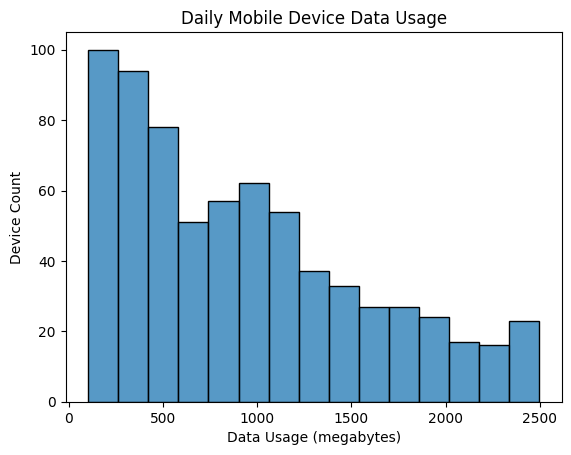

In [22]:
# Create a historgrapm of the column "ScreenOnTime" from dataset mobile
screenTimeHist = sns.histplot(data=mobile, x="DataUsage", bins = 15)

#set title and x/y labels
screenTimeHist.set(xlabel = 'Data Usage (megabytes)', ylabel = 'Device Count', title = 'Daily Mobile Device Data Usage')
plt.show()

<b>Insight 2:</b> The most popular mobile device models among users are the Xiaomi Mi 11 and the iPhone 12 models.

r2: Countplot for categorical data with multiple values. (Univariate)<br>
This insight was discovered by doing a categorical analysis on the DeviceModel column using a count plot. The goal was to discover which device models were most used among the users in this dataset (find the columns with the highest count). By looking at the graph, it is clear that Xiaomi Mi 11 and iPhone 12 have the highest counts, signifying the largest user population. However, we can also note that all the values are extremely similar, these two models only winning by a very small margin. Since we were not the ones to collect this data, we cannot know if this similarity in distribution is on purpose (the data collectors may have searched for an even spread of users among all the models) or if it can be indicative of the model popularity outside of this study. In the end, we are only analyzing the data within the context of this study, so regardless of the mostly even distribution of the models, this count plot can prove that the two models in the insight are the most used.

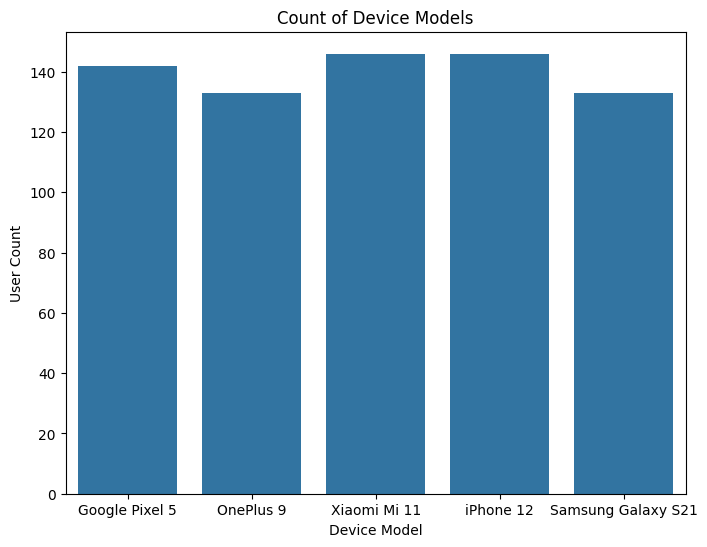

In [23]:
#set the size of the graph
#since the device model names are a bit long, we need to make the graph wider in order to read everything
plt.figure(figsize=(8, 6))

#create a countplot of column "DeviceModel" from "mobile" dataset
deviceModelCount = sns.countplot(x='DeviceModel', data=mobile)

#add a title and x/y labels
deviceModelCount.set(xlabel = 'Device Model', ylabel = 'User Count', title = 'Count of Device Models')
plt.show()

<b>Insight 3:</b> Most mobile device users have a light to moderate daily interaction time with their devices. (Univariate)

r3: Grouped Data Counterplot<br>
This insight was discovered by grouping the numerical "ScreenOnTime" column into 3 categories: Light usage (1-4h), Moderate usage (5-8h) and Heavy usage (9-12h), and creating a countplot of these categories. The goal of this grouping was to determine if the bulk of users prefer to spend a lot of time on their devices or if they use them minimaly. In order to do this, we needed to determine the levels of usage by grouping set ranges into categories based on excessiveness of use. In the end, we were able to determine the most common time ranges that people interact with their mobile devices (it is assumed that if the screen is on, then they are actively interacting with the device). Looking at the countplot, we can see that the highest count of users is in the light usage range, but due to how close the moderate usage count is, I decided to include it in the insight as well; moderate usage still makes up a large population of users even if it is not the mode. Heavy usage can clearly be seen as the least populated range, with a drop of around 150 users from moderate. Therefore, due to the bulk of the distribution being found in the Light and Moderate usages, we can confidently state that the majority of users fall within that range.

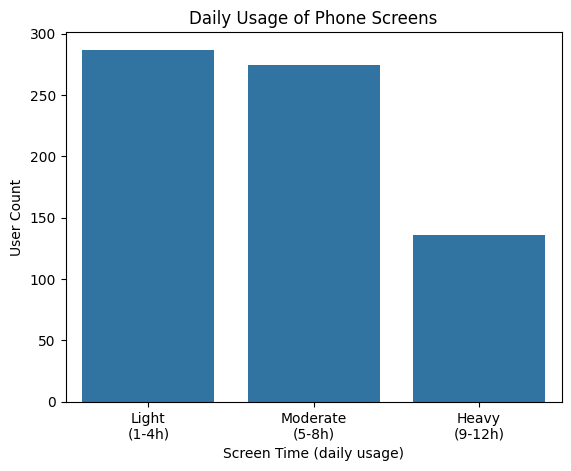

In [24]:
#group ScreenOnTime based on usage ranges
bins = [1, 4, 8, 12]
labels = ["Light\n(1-4h)", "Moderate\n(5-8h)", "Heavy\n(9-12h)"] 
mobile["Usage"] = pd.cut(mobile["ScreenOnTime"], bins=bins, labels=labels)

#create a countplot of new grouped column "Usage" 
screenUsageCount = sns.countplot(x='Usage', data=mobile)

#add a title and x/y labels
screenUsageCount.set(xlabel = 'Screen Time (daily usage)', ylabel = 'User Count', title = 'Daily Usage of Phone Screens')
plt.show()

<b>Insight 4:</b> Android mobile devices are used by more male users, while iOS devices have more female customers.

r4: Comparing categorical data with 2 values (Bivariate)
This insight was discovered by comparing the Male and Female user counts for the two given Operating Systems (Android and IOs). The data was analyzed in a countplot of the Operating Systems, splitting their counts by Male/Female and displaying these split counts side by side with differnet hues. On the Android side of the graph, we can see a clear height difference between Male and Female users, with the Male (blue) bar having a higher user count. The IOS side, however, has the male and female counts much closer together, to the point where they can be almost considered identical. But, since the purpose of this analysis is to identify which gender uses the model more, the very slight lead on the Female (orange) bar should be acknowledged. So, using these observations of the counts, we can state that Android is a more male dominated operating system, while IOS is more popular for Females.

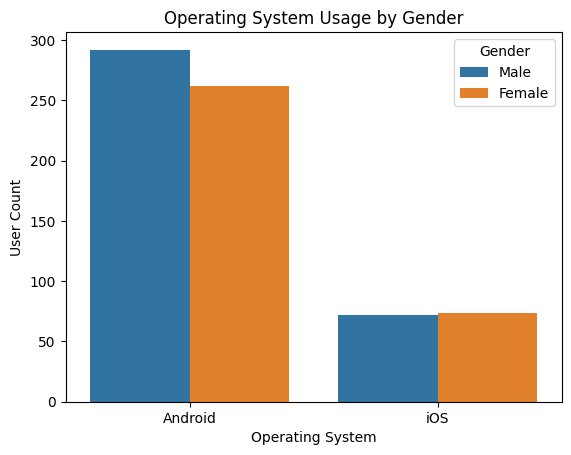

In [25]:
#create a dual bar countplot to show the count of operating system per user's gender
opSysByGenderCount = sns.countplot(data=mobile, hue='Gender', x='OperatingSystem')

#set the title and x/y labels
opSysByGenderCount.set(xlabel = 'Operating System', ylabel = 'User Count', title = 'Operating System Usage by Gender')
plt.show()

<b>Insight 5:</b> The iPhone 12 mobile device model has the consumers with the most excessive device usage.

r5: Comparing categories with more than 2 values (Bivariate) <br>
This insight was discovered by creating a countplot of all 5 device model categories and dividing their counts by the User Behavior Class column. Since Behavior Class categorizes users based on their overall device usage, we can use these classes to determine which users interact with their devices the most (1 = least usage, 5 = most usage). The goal of this countplot was to determine which device model has the most avid users, which would mean searching for the model with the lower counts for Classes 1-2, and higher overall counts for Classes 4-5. Although iPhone 12 doesn't necessarily have the highest count for category 4, it does have have most of its user distribution scattered amongst Classes 2-5, with the highest overall Class 5 count. Additionally, out of all the models, it has the lowest count of Class 1 users, meaning that it has the least amount of light users. Comparing their light users with the huge jump to moderate users and the consistent distribution from Class 2-5 (none of the other models have such a high jump from their low usage, nor do they have such a consistent high count among their higher Classes), it can be determined that iPhone 12 has the most addicted users out of all the device models. 

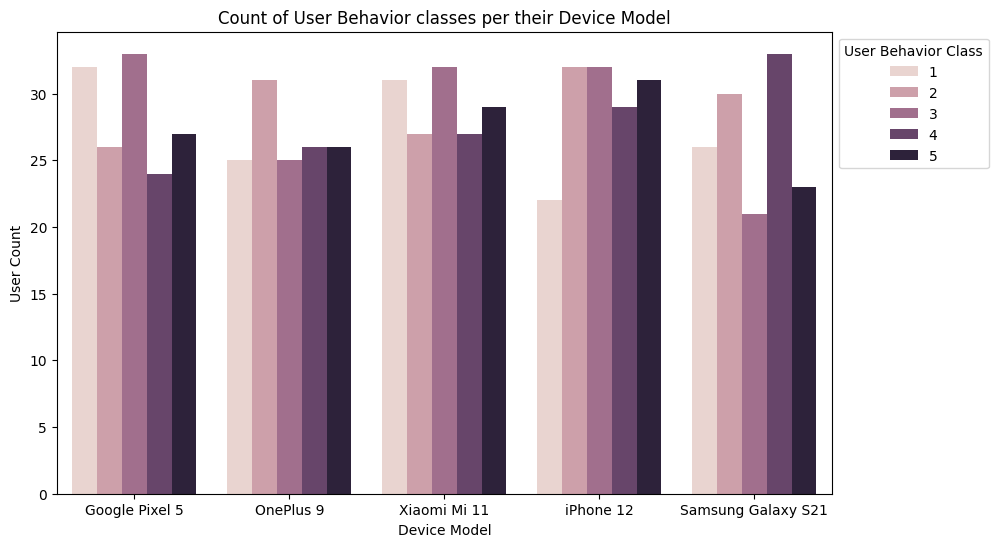

In [26]:
#set the size of the graph
#since we have so many categories, we want to make the graph wider so it is more readable
plt.figure(figsize=(10, 6))

#create the count plot for Device Model and split its count by User Behavior Class
behaviorClassByModel = sns.countplot(data=mobile, hue='UserBehaviorClass', x="DeviceModel")

#we also want to add readability to the legend by renaming its title and by moving it out of the way of the graph
behaviorClassByModel.legend(title="User Behavior Class", bbox_to_anchor=(1, 1))

#renaming the title of the graph, along with the x/y labels
behaviorClassByModel.set(xlabel = 'Device Model', ylabel = 'User Count', title = 'Count of User Behavior classes per their Device Model')
plt.show()

## r6 - Numerical / Numerical

(a) Insight: More battery was drained as the person used their data
<br><br>
(c) To arrive at this insight, we used descriptive analytics to determine a correlation between data usage and battery drain. By looking at the scatterplot, a pattern can be seen between the two data variables. Noticed is a right-upward relationship between the x and y axes. As more data in a day was used, the phone's battery also drained more on that day. Thus, it can be said that mobile data affects a phone's battery life. Things that would consume data and cause data usage to increase, would also cause a user's phone's battery to drain more. This shows the effect data usage has on battery drainage.
<br><br>
(d) Both columns in the data set are numerical values, so a scatterplot was used to visualize the correlation. In the scatter plot, data usage was modeled on the x-axis and battery drain on the y-axis. By doing this, we could see how an increase in values on the x also increased the y-axis values.

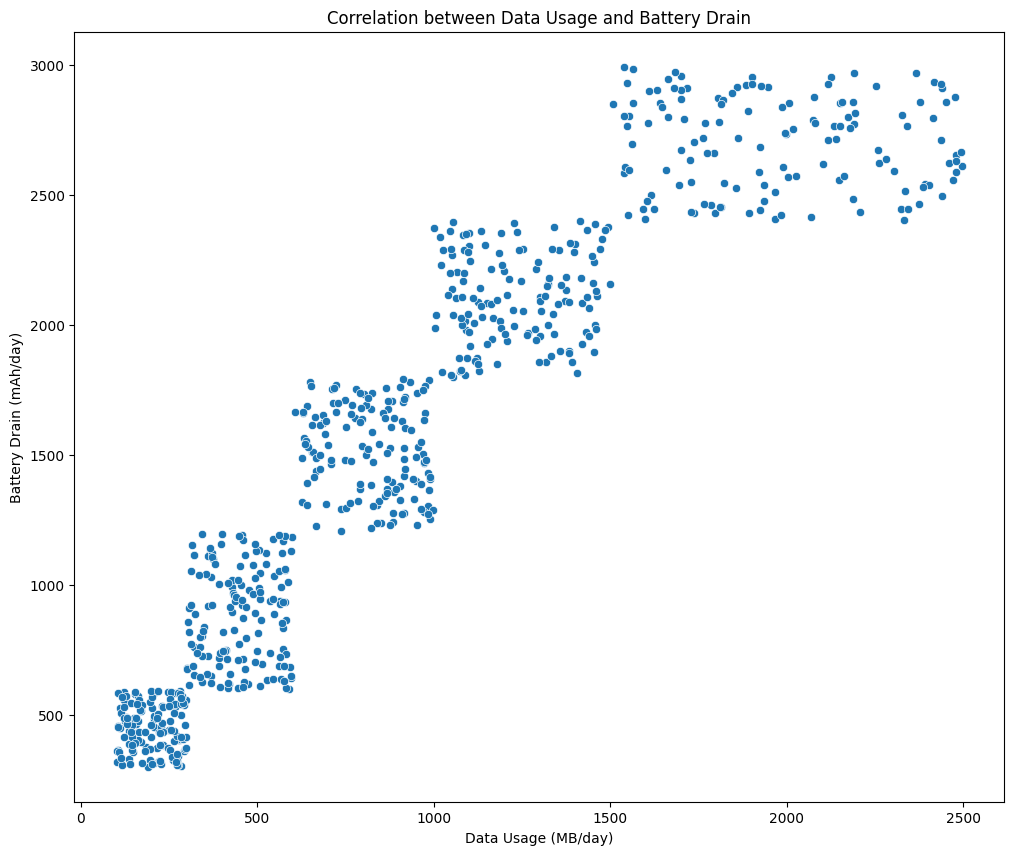

In [27]:
# DATA USAGE VS BATTERY DRAIN
# Plot scatter plot
plt.figure(figsize=(12, 10))
sns.scatterplot(data=mobile, x="DataUsage", y="BatteryDrain")

# Axis labels and title
plt.xlabel("Data Usage (MB/day)")
plt.ylabel('Battery Drain (mAh/day)')
plt.title('Correlation between Data Usage and Battery Drain')

# Show plot
plt.show()

## r6 (2nd) - Numerical/Numerical

(a) Insight: App usage time in a day increased when there were more apps downloaded on a person's phone.
<br><br>
(c) A diagnostic analysis was used to come to this insight. Through this analysis, it can be seen that when a user's app usage time was high, they also had a large amount of apps installed. The same can be said for the opposite; a lower app usage time had a lower amount of apps installed. This may be due to the user needing to visit each app on their phone, resulting in an increase in app usage if there are many apps to visit. Also, users with a higher number of apps may receive more notifications, causing frequent app interaction and driving up their app usage time per day. Thus, from the scatter plot, it can be seen that based on the dispersion of points in an upward-diagonal, the more apps installed on a phone correlated with the number of minutes per day a person spent using the apps on their phone. When the x-axis values increased, so did the y-axis values. Therefore, more apps led to an increase in app usage time.
<br><br>
(d) This evidence was obtained by creating a scatter plot using Seaborn. The x-axis represented the app usage time measured in minutes per day, while the y-axis represented the number of apps installed on the phone. By plotting app usage time versus the number of apps downloaded, we were able to analyze how having more apps on a phone caused a larger app usage time value (right-upward relation).

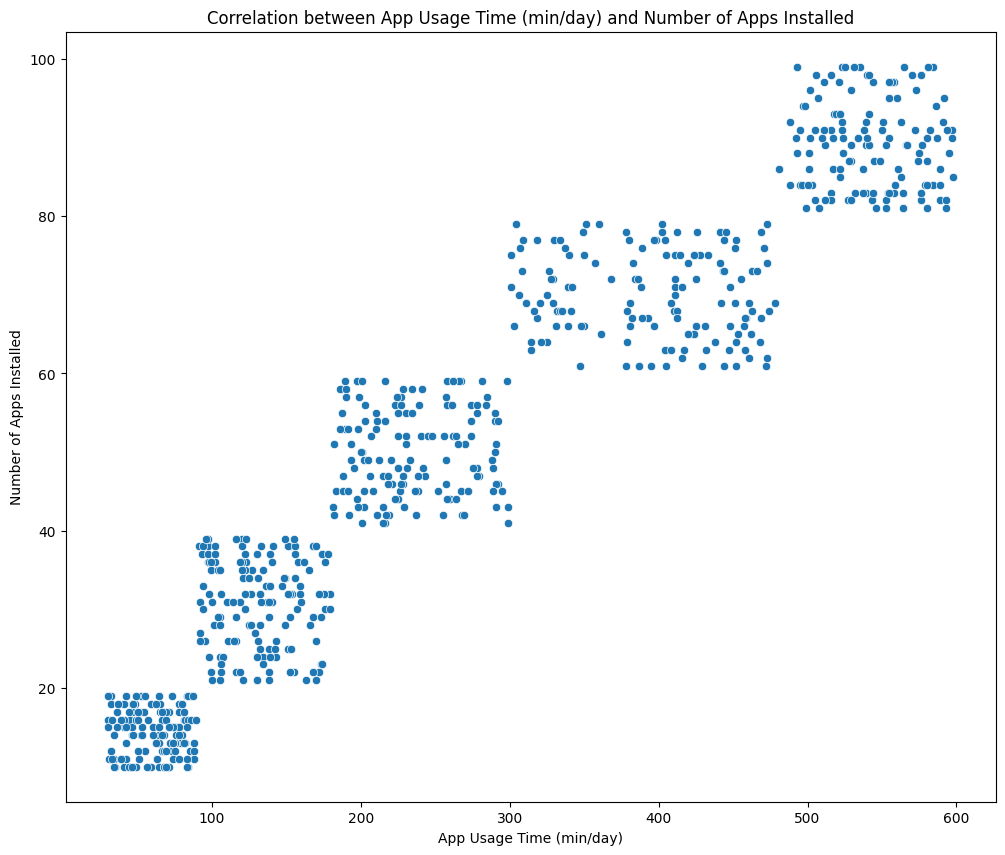

In [28]:
# APP USAGE AND NUMBER OF APPS
# Plot scatter plot
plt.figure(figsize=(12, 10))
sns.scatterplot(data=mobile, x="AppUsageTime", y="NumberOfAppsInstalled")

# Axis labels and title
plt.xlabel("App Usage Time (min/day)")
plt.ylabel('Number of Apps Installed')
plt.title('Correlation between App Usage Time (min/day) and Number of Apps Installed')

# Show plot
plt.show()

## r7 - Numerical / Categorical

(a) Insight: People aged 42 years use their phones the least while 34-year-olds use their phones the most.
<br><br>
(c) Descriptive analytics was used to arrive at this insight. After analyzing the histograms for each class, it can be seen that in user behaviour class 1 (i.e. the group of users that use their phone the least), people aged 42 had the highest bar. This meant, that in the group of users who rarely use their phones, this age ranked first for having using their phone the least. On the other hand, in user behaviour group 5, the group who uses their phone the most, 34-year-olds had the highest count. This means that they are the top-ranked age who use their phone the most. In behaviour class other than 1, users 42 years old were mainly in the minority. Meanwhile, in classes other than 5, 34-year-olds were mainly in the lower-middle grouping. Thus, indicating a consistent pattern throughout the user behaviour classes in how these ages use their phones.
<br><br>
(d) Using Seaborn's displot function, for each user behaviour class, a histogram was created to count the occurrences that age fell in a category/class. By plotting a histogram for each category to analyze this data, it would be easy to see which age had the highest frequency in each behaviour class. From this, we would be able to tell which ages used their phones the most and which used their phone the least. Thus, to collect this evidence, each subplot represented a user behaviour class. On the x-axis we had the ages collected and on the y-axis were the occurrence/count that the age appeared in the respective class.


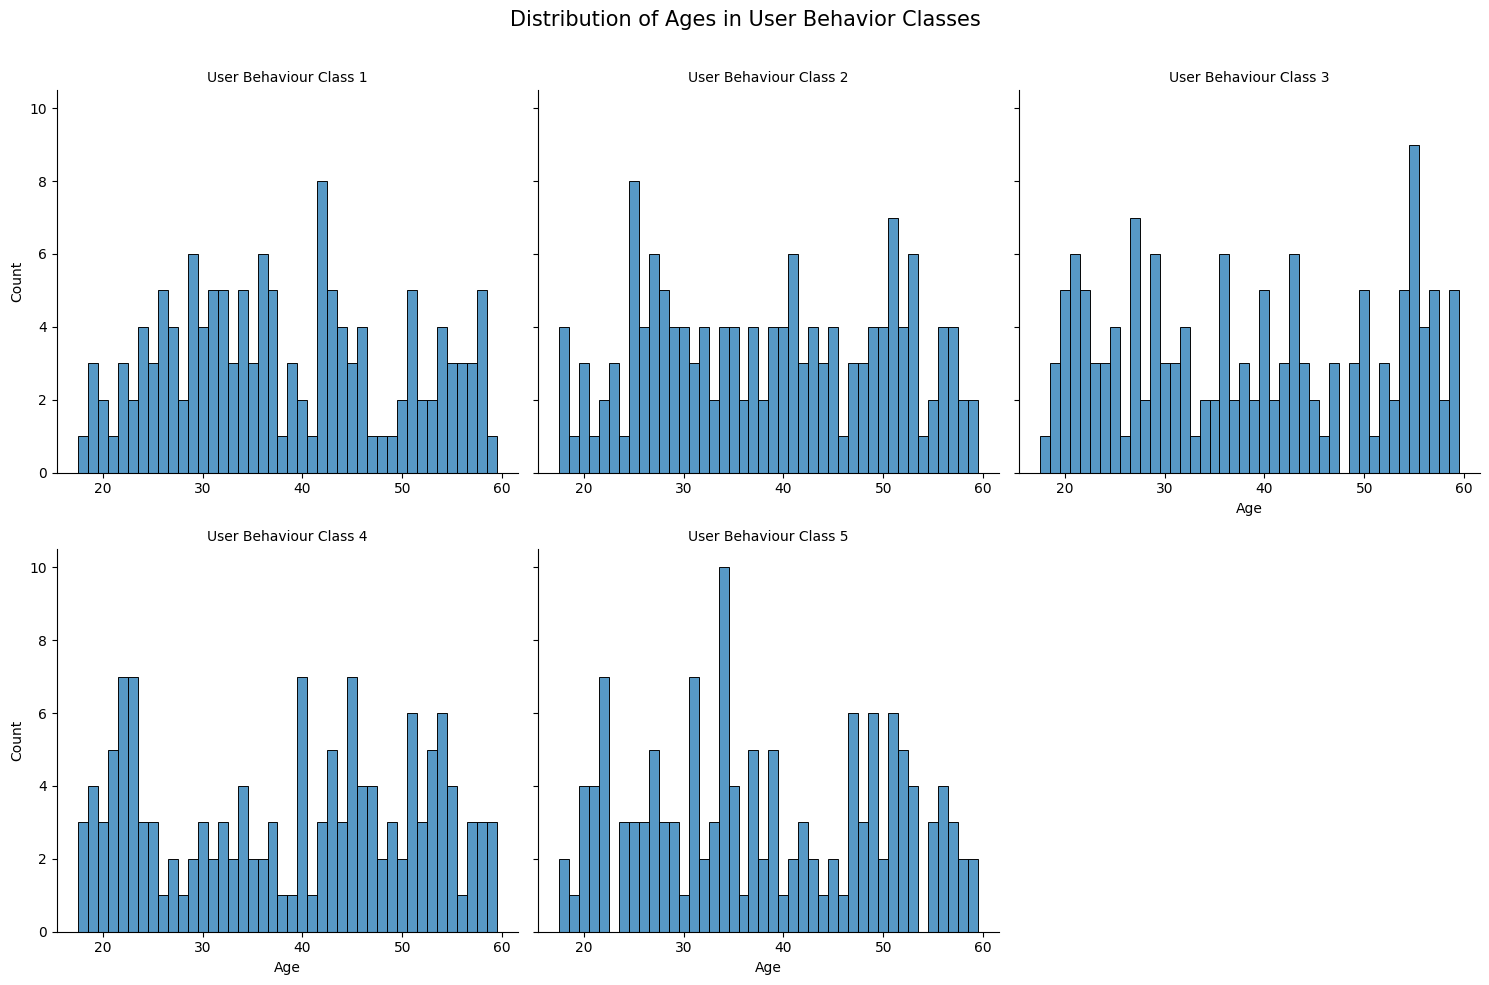

In [29]:
# USER BEHAVIOR VS AGE
# Create displot for each user behaviour class
g = sns.displot(
    mobile,
    x="Age",
    col="UserBehaviorClass",
    discrete=True,
    col_wrap=3
)

# Title and layout adjustments
g.figure.suptitle("Distribution of Ages in User Behavior Classes", fontsize=15) # main title
g.set_titles("User Behaviour Class {col_name}")  # title for each subplot
g.tick_params(axis='x', labelbottom=True) # shows x-axis values in each subplot

# Adjust facuet spacings
plt.subplots_adjust(hspace=0.2)  # vertical spacing between subplots
plt.subplots_adjust(top=0.9)  # move title up

# Show plot
plt.show()

## r7 (2nd) - Numerical/Categorical

(a) Insight: The young age group (ages 18-24) and middle-aged phone users (ages 32-38 and ages 46-52) have a higher app usage time median compared to any other age group.
<br><br>
(c) This insight was discovered using diagnostic analytics. This insight showed a trend in the age groups. In the age groups with the higher median, that is around the time of life when people are either not working, are in school, or have already solidified themselves in their jobs. Meanwhile, the age groups with a lower median, are the age groups when most people are just starting a new job, working towards a promotion, or nearing retirement. The differences in where people lie in life and their societal roles contribute to a person's app usage time. Each age group has different priorities in life, which in turn, influences their app usage time.
<br><br>
(d) Evidence was collected by grouping the ages into 6 different categories. Every 6-year interval starting from age 18 up to age 59, represented a new group. Each age group was represented with a box plot and the y-axis represented that group's app usage time. After creating the boxplots, it could be seen that groups 1, 3, and 5 had a higher median for app usage time compared to the other groups. 

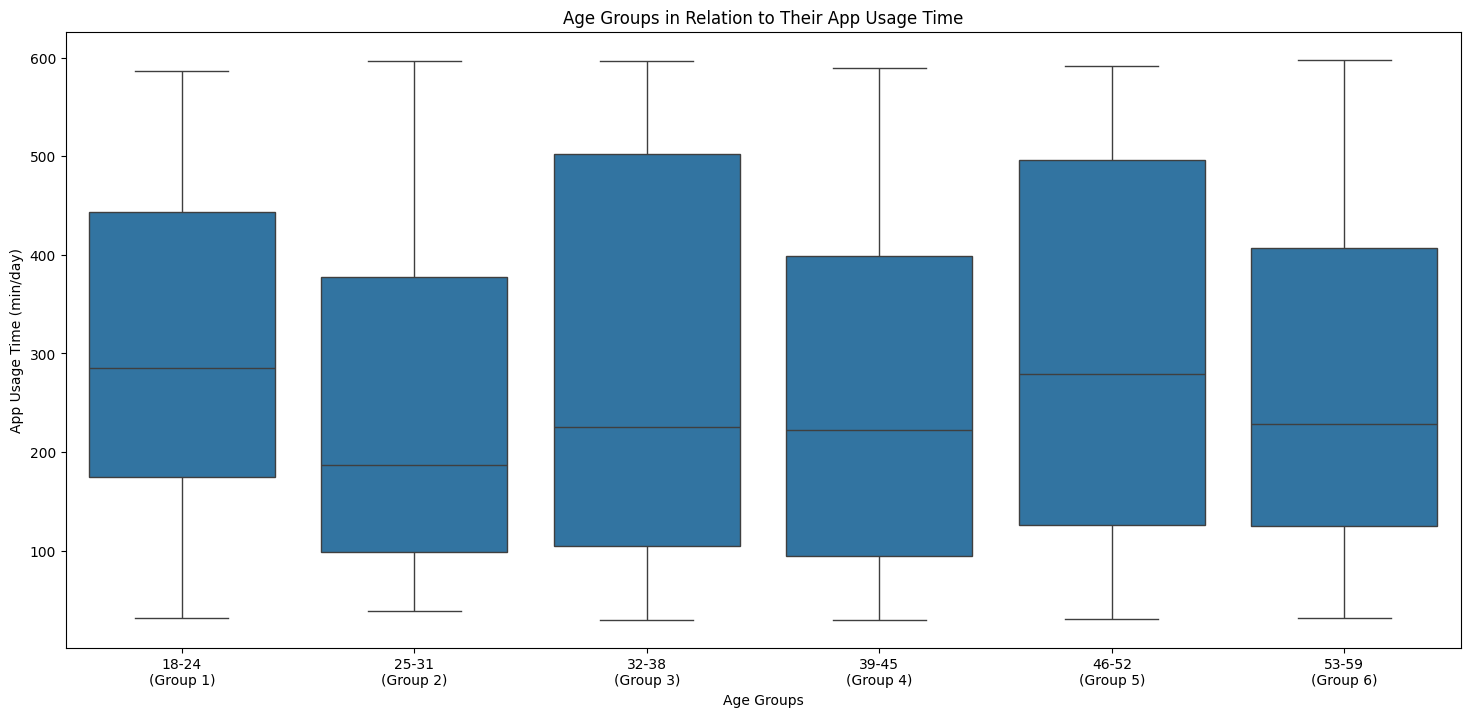

In [30]:
# AGE AND APP USAGE TIME
# Resize figure
plt.figure(figsize=(18, 8))

# Group ages into categories
'''
Group 1: ages 18-24
Group 2: ages 25-31
Group 3: ages 32-38
Group 4: ages 39-45
Group 5: ages 46-52
Group 6: ages 53-59
'''
bins = [18, 24, 32, 39, 46, 53, 59]  # boundaries
labels = ["18-24\n(Group 1)", "25-31\n(Group 2)", "32-38\n(Group 3)", "39-45\n(Group 4)", "46-52\n(Group 5)", "53-59\n(Group 6)"]  # x-axis labels
mobile["AgeGroup"] = pd.cut(mobile["Age"], bins=bins, labels=labels) # create new column

# Create boxplot
sns.boxplot(x="AgeGroup", y="AppUsageTime", data=mobile)

# label axis and title
plt.xlabel("Age Groups")
plt.ylabel("App Usage Time (min/day)")
plt.title("Age Groups in Relation to Their App Usage Time")

# Show plot
plt.show()

## r7 (2nd) - Numerical/Categorical

(a) Insight: Both iOS and Android operating systems are comparable on phone battery drainage
<br><br>
(c) This insight was discovered using descriptive analytics. From the boxplots, it can be seen that the median for both operating systems had approximately the same battery drainage per day. This would mean that both iOS and Android perform at similar levels regarding battery life. Thus, suggesting that neither operating system outperforms the other in terms of battery life (the battery will drain at around the same rate regardless of the operating system).
<br><br>
(d) Evidence was collected using a boxplot for each operating system and comparing their median for battery drainage. On the x-axis were the operating systems. The y-axis showcased the battery drain numeric values. Based on the boxplot visualized, it can be seen that for both boxplots, their median line is around the same battery drainage value (approx. 1500 mAh).

Text(0.5, 1.0, 'Phone Battery Drainage According to Operating Systems')

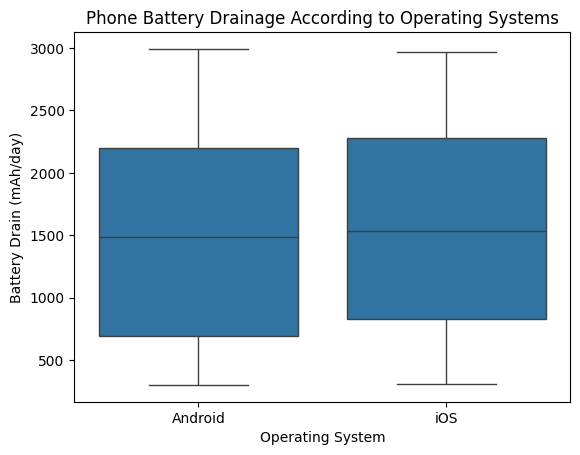

In [42]:
# OPERATING SYSTEM AND BATTERY DRAIN

# Plot boxplot
sns.boxplot(x="OperatingSystem", y="BatteryDrain", data=mobile)

# label axis and title
plt.xlabel("Operating System")
plt.ylabel("Battery Drain (mAh/day)")
plt.title("Phone Battery Drainage According to Operating Systems")

<h1 style="text-align:center;"><a href="https://www.kaggle.com/datasets/ajinilpatel/energy-consumption-prediction">Dataset 2 (energy)</a></h1>

# DESCRIPTION

<i>Dataset name:</i> Energy consumption prediction
<br>
<i>Author:</i> Jinil Patel
<br>
<i>Purpose:</i> To analyze energy consumption across different days and months of the year.
<br>
<i>Domain:</i> Energy and Utilities, with a focus on consumption prediction.
<br>
<i>Audience:</i> Energy/hydro companies who wish to analyze energy consumption patterns in buildings
<br>
<i>Shape:</i> 5000 rows, 12 columns

<i>Categorical Variables:</i> 
- Month: Numbers 1-12 representing all the year's months.
- Hour: Numbers 0-23, representing the hours of the day in military time.
- Day of Week: Text values representing all the 7 days of the week (Sunday - Saturday).
- Holiday: Bivariate (boolean) value, reporting if the current day is a holiday (yes or no)
- HVAC Usage: Bivariate (boolean) value, stating whether the heating, ventilation, or air conditioning is on (on or off).
- Lighting Usage: Bivariate (boolean) value, indicating whether any lighting systems are currently used (on or off).

<i>Numerical Variables:</i> 
- Temperature: Number representing the current temperature in degrees Celsius.
- Humidity: Percentage of the current humidity level.
- Occupancy: Number of people currently in the area that is being assessed.
- Square Footage: Number representing the square footage of the building/space, measured in square feet.
- Renewable Energy: The proportion of energy supplied by renewable sources.
- Energy Consumption: The number of total energy consumed at that instance of time

<i>Redudancy/Missing Values:</i> 
- None

## r1 - Numerical

(a) Insight: On most days, the total energy consumed is approximately between 70-80 units.
<br><br>
(c) A descriptive analysis was done to arrive at this insight. Looking at the histogram, the bars with the highest frequency count in the dataset were values ranging between 70 and 80 units. This tells us that on most days, the total energy consumed fell between this range. Outside of this range, less energy was consumed, hence why those values had shorter bars (occurred less often in the data).
<br><br>
(d) The evidence was obtained by graphing the energy consumption column onto a histogram. Using matplotlib, we could highlight the occurrences of energy consumed within a range and use that to compare the data in each range. On the x-axis, the total energy consumed was represented. The y-axis showed the count/frequency. From there, we could notice which ranges had a higher frequency based on their y-values (height of bars).

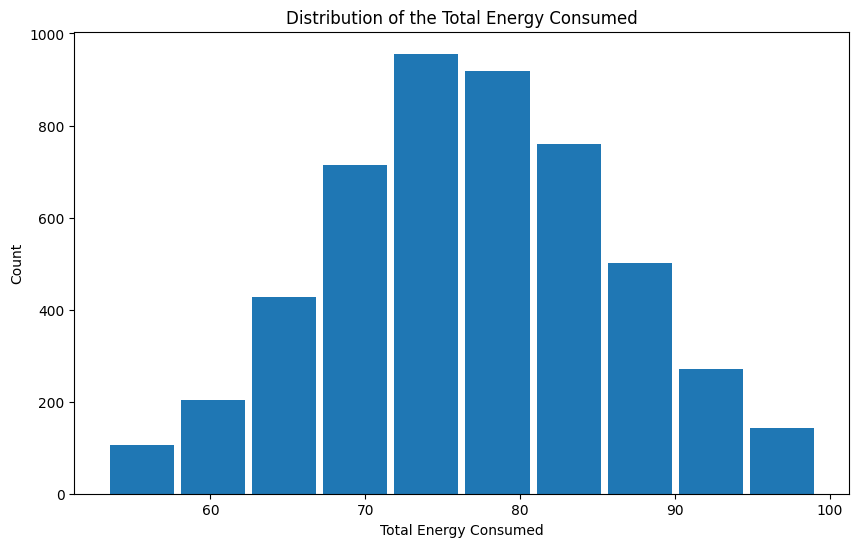

In [32]:
# TEMPERATURE
plt.figure(figsize=(10, 6))

# Create histogram
plt.hist(x="EnergyConsumption", data=energy, rwidth=.9)

# Axis labels and title
plt.xlabel("Total Energy Consumed")
plt.ylabel("Count")
plt.title("Distribution of the Total Energy Consumed")

# Show histogram
plt.show()

## r2 - Categorical

(a) Insight: There is a consistent usage of energy throughout a day
<br><br>
(c) This insight was derived using descriptive analytics. Based on the count plot, the values remained fairly similar throughout all the hours of the day. This suggests that from the data collected, there was a regular pattern of energy usage. Since there are no major spikes to suggest any peak activity times, it can be said that at the location where this data was gathered, their energy consumption remained fairly consistent since it can be seen that there is a uniform distribution of data for each hour.
<br><br>
(d) This evidence was obtained by plotting the hour values on the x-axis and having the count on the y-axis. This allowed us to visualize which hours, if any, had a significantly higher bar. This would indicate that that hour had more data readings than others. The same can be said for any bars that would have a lower count. 

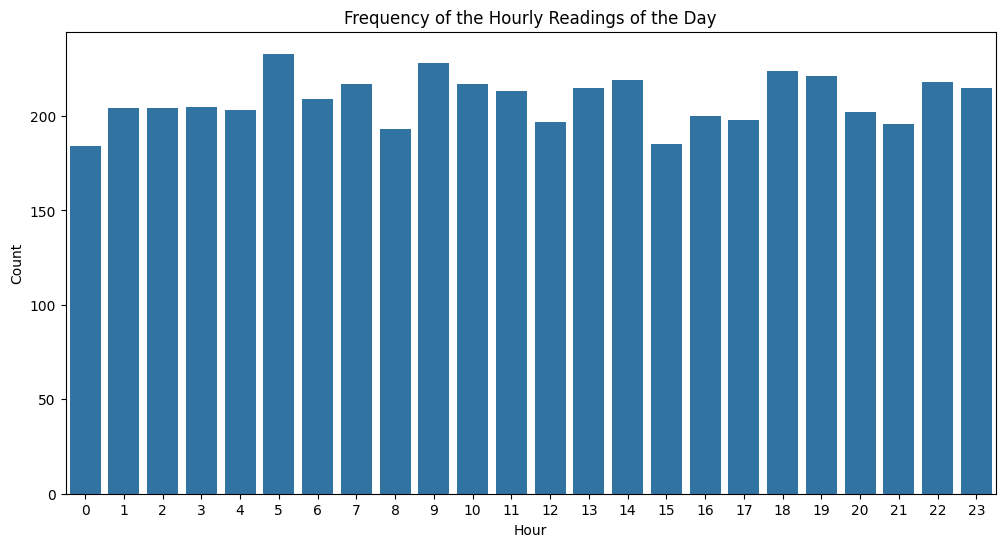

In [33]:
# HOUR

# Resize figure
plt.figure(figsize=(12, 6))

# Create countplot
sns.countplot(x="Hour", data=energy)

# Axis labels and title
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Frequency of the Hourly Readings of the Day")

# Show histogram
plt.show()

## r3 - Categorical

(a) Insight: There are mainly 4-6 people (medium-level occupancy) in an area when energy is being consumed.
<br><br>
(c) To arrive at this insight, descriptive analytics was performed. By doing data aggregation and sorting occupancy into 3 categories (low, medium, and high occupancy), we could visually see the frequency for each group. From the grouped count plot, it was seen that the medium occupancy level had the highest bar. This would indicate that when energy was being consumed and recorded, there were mainly 4-6 people in that area.
<br><br>
(d) Evidence was collected by categorizing occupancy into 3 levels with equal amounts of people. When there were 0-3 people in an area, that was grouped into a low level. The medium occupancy level contained 4-6 people and 7-9 people in the high level. From there, a count plot was created to record the frequency of each level in the dataset. This helped visualize which groups had a high occurrence in the data and which occupancy level had the lowest.

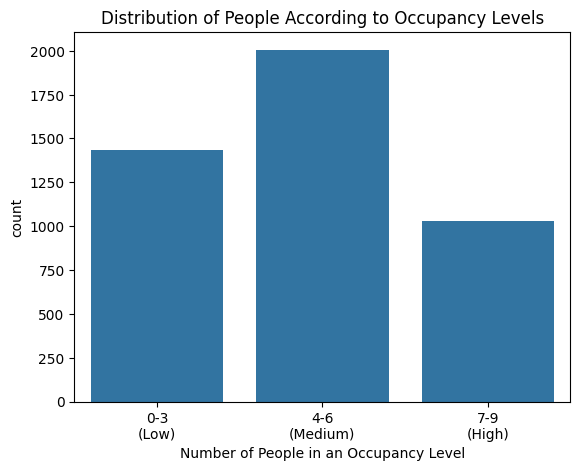

In [34]:
# OCCUPANCY
'''
Groups:
Low - 0-3 people
Medium - 4-6 people
High - 7-9 people
'''

# Create the groupings into bins
bins = [0, 3, 7, 9]  # boundaries
labels = ["0-3\n(Low)", "4-6\n(Medium)", "7-9\n(High)"]  # x-axis labels
energy["OccupancyGroups"] = pd.cut(energy["Occupancy"], bins=bins, labels=labels) # create new column

# Create the count plot using the new column
sns.countplot(x="OccupancyGroups", data=energy)

# Axis labels and title
plt.xlabel("Number of People in an Occupancy Level")
plt.title("Distribution of People According to Occupancy Levels")

# Show countplot
plt.show()


## r4 - Categorical / Categorical

(a) Insight: Lights are turned off more often when it is a non-holiday compared to a holiday.
<br><br>
(c) This insight was derived using descriptive analytics. By examining the count plot and comparing the two categories (non-holiday vs. holiday), it is evident that the bar representing lights being off (blue bar) is higher than the bar for lights being on (orange bar), particularly on non-holidays. Conversely, on holidays, the heights of the light usage bars are nearly equal, with a slight variation of approximately 200 counts between the two blue bars. This analysis indicates that lights are turned off more often on non-holidays compared to holidays.
<br><br>
(d) To obtain this evidence, we took the categorical variable Holiday and compared that to the categorical variable Lighting Usage. From there, a count plot was created to compare whether lights were on or off more often depending on whether the day was a holiday or not. The x-axis showed the boolean variable Holiday (non-holiday vs. holiday). For clarity, the yes/no values were renamed to holiday/non-holiday respectively. The y-axis showed the frequency count for each lighting usage and the number of times it appeared in the data depending on the holiday status.

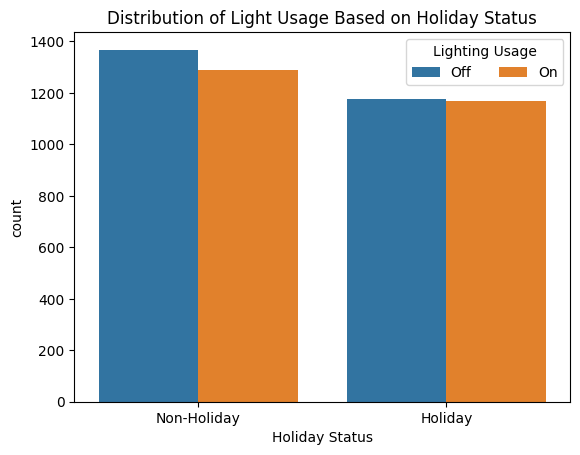

In [35]:
# HOLIDAY AND LIGHTING USAGE

# Plot count plot
sns.countplot( x="Holiday", hue="LightingUsage", data=energy)

# Move legend to the top right
plt.legend(
            loc='upper right',
            ncol=2,
            title='Lighting Usage'
        )

# Axis labels and title
plt.xlabel("Holiday Status")
plt.title("Distribution of Light Usage Based on Holiday Status")

# Rename the x-axis ticks for clarity
plt.xticks(ticks=[0,1], labels=['Non-Holiday', 'Holiday'])

# Show figure
plt.show()


## r5 - Categorical / Categorical

(a) Insight: Occupancy levels are medium to high on mid-weekdays (Tuesday through Thursday), lower on Sundays and Mondays, and higher on Fridays and Saturdays
<br><br>
(c) Diagnostic analytics were used to arrive at this insight. On Tuesdays, Wednesdays, and Thursdays, occupancies with 5-9 people (indicating mid-high level occupancy) showed high bars. This could indicate people being at work in the same building. Additionally, on Sundays and Mondays, the bars for lower occupancy levels (0-4 people) were higher, while the counts for higher occupancies were lower. Indicating a lower frequency of large gatherings at the beginning of the week. Meaning that people could be winding down after social gatherings on the weekend and are preparing for work again. Finally, it was seen that at the end of the week, Fridays and Saturdays exhibited higher counts in the high occupancy levels (7-9 people), suggesting large gatherings of people in the area (ex. parties occurring).
<br><br>
(d) To obtain this evidence the categorical variable, Day of the Week, was ordered according to the Gregorian calendar. Therefore, Sunday was considered to be the beginning of the week while Saturday was placed as the last day of the week. Occupancy was also ordered according to increasing value. So, occupancy's starting value was 0 people and went up to 9 people. To plot the graph, the x-axis would represent the days of the week. Then for each day, there was a separate bar to represent the occupancy count recorded. Each occupancy had a different colour assigned to indicate each occupancy value.

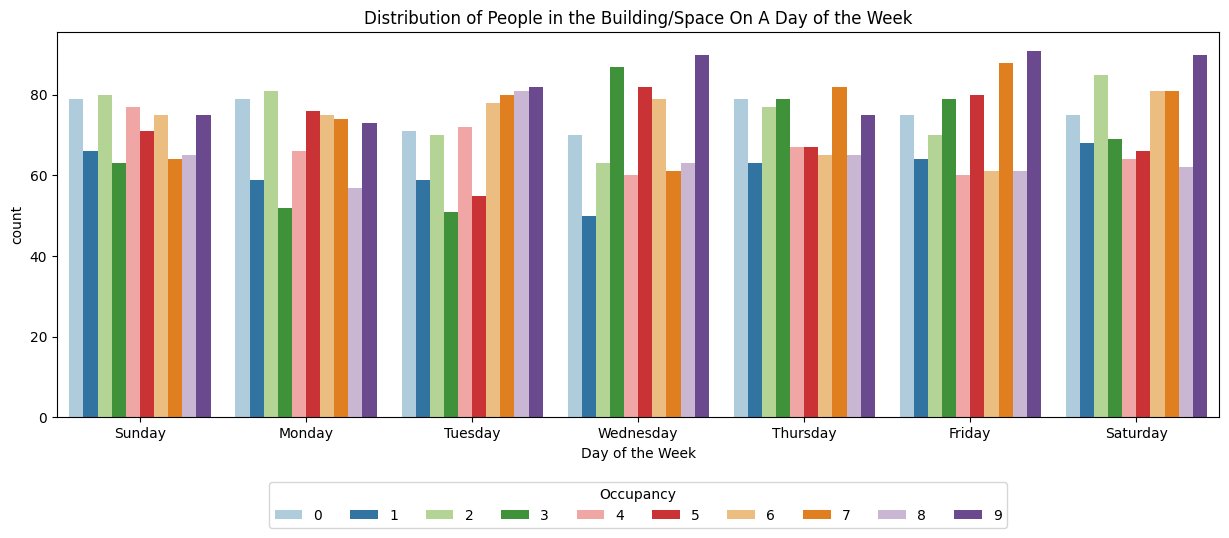

In [36]:
# DAY OF THE WEEK AND OCCUPANCY

# Resize figure
plt.figure(figsize=(15, 5))

# Set the new order for the days of the week
'''
New Order for the Days of the Week: 
Sunday > Monday > Tuesday > Wednesday > Thursday > Friday > Saturday
'''
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Plot Countplot
sns.countplot(x="DayOfWeek", hue="Occupancy", data=energy, palette="Paired", order=order, width=0.85)

# Move legend
plt.legend(
    loc='upper center',
    ncol=10,
    bbox_to_anchor=(0.5, -0.15),
    title='Occupancy'
)

# Plot axis labels and title
plt.xlabel("Day of the Week")
plt.title("Distribution of People in the Building/Space On A Day of the Week")

# Show plot
plt.show()

<b>Insight 6:</b> In a range of 20-30 degrees celcius, higher temperatures require more energy consumption.

r6: Use the scatterplot to highlight correlation (Bivariate)<br>
This insight was discovered by creating a scatterplot to discover correlation between Temperature and Energy Consumption. By putting Temperature in the x-axis and Energy Consumption in the y-axis, we are trying to see if temperature could have any effect on Energy Consumption. By looking at the scatter plot, we can determine that temperature does, in fact, correlate with Energy Consumption due to the positive linear regression spotted in the graph. As the points travel to the right into higher temperatures, they also tend towards the upper side of the plotgraph, indicating a trend of higher energy consumption. While there are also quite a few points that go a bit wide (seemingly outliers to this trend), we notice that those too get more sparce in the top left and bottom right corners, indicating that they also follow this positive regression. Therefore, we can determine that higher temperatures and higher energy consumption go hand in hand.
<br><br>
It is also important to note, however, that we cannot make a definite conclusion on the Energy Consumption at lower temperatures because there are none (the data includes a very limited range of 20-30 degrees celsius). Using domain knowledge, we know that people are more likely to use their heating systems when temperatures lower past the 20 degree mark, so we can assume that the energy consumtion will rise to the left as well. Therefore, while I can state that the consumption gets more excessive with warmer temperatures, I cannot similarily state that is gets lower with colder temperatures.


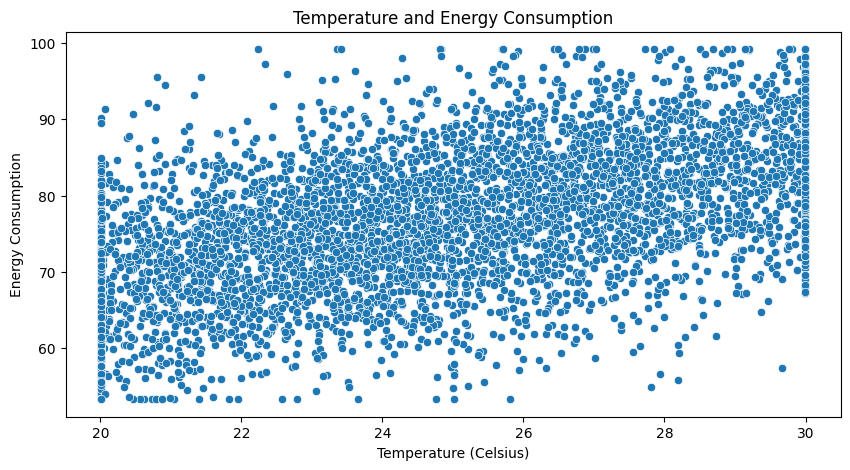

In [37]:
#Make the graph a bit wider so we can see the point distributions clearer
plt.figure(figsize=(10, 5))

#Create a scatterplot for dataset Energy to compare Temperature to Energy Consumption
humidityAndEnergy = sns.scatterplot(data = energy, x = 'Temperature', y = 'EnergyConsumption')

#Modify the title and the x/y labels
humidityAndEnergy.set(xlabel = 'Temperature (Celsius)', ylabel = 'Energy Consumption', title = 'Temperature and Energy Consumption')

plt.show()

<b>Insight 7:</b> The size of an area does not impact the amount of energy that is consumed within that area.

r6: Use the scatterplot to highlight correlation (Bivariate)<br>
This insight was discovered by creating a scatterplot to check for correlation between Square Footage (size of area where the energy is consumed) and Energy Consumption. By putting Square Footage in the x-axis and Energy Consumption in the y-axis, we're looking for a potential impact that area size could have the amount of energy that is needed. However, looking at this scatterplot, there is no correlation to be found. The points are everywhere in the graph, with no positive or negative linear trends. The only consistent behaviour in this chart is that the largest point concetration stays within the range of around 70-90 on the y-scale as the Square Footage continues towards higher values. With this observation, we can conclude that Square Footage definitely has no effect on Energy Consumption inside this data set.

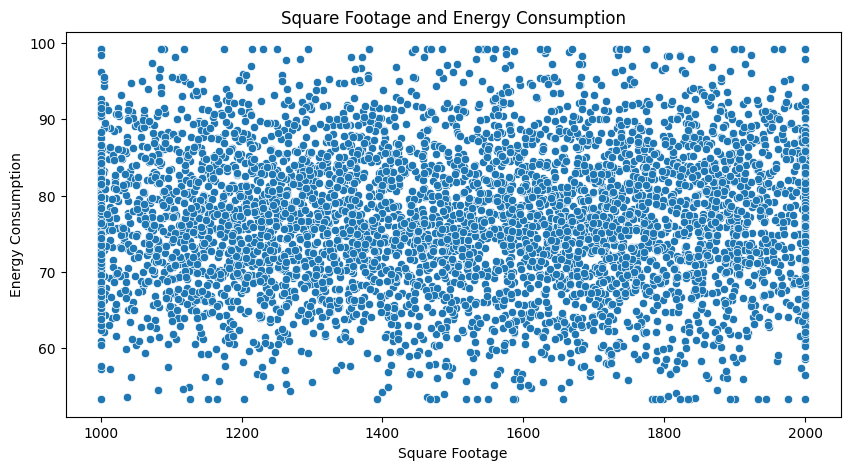

In [38]:
#Making the size of the graph wider for better readability
plt.figure(figsize=(10, 5))

#Create a scatterplot for dataset Energy to compare Square Footage to Energy Consumption
humidityAndEnergy = sns.scatterplot(data = energy, x = 'SquareFootage', y = 'EnergyConsumption')

#Modify the title and the x/y labels
humidityAndEnergy.set(xlabel = 'Square Footage', ylabel = 'Energy Consumption', title = 'Square Footage and Energy Consumption')

plt.show()

<b>Insight 8:</b> Winter months have a more central distribution of Energy Consumption, while warmer seasons have more varied energy usages.

(r7) Split the data by certain categories to explore the numerical distributions<br>

This insight was discovered by splitting the numerical Energy Consumption data into 4 seasonal groups based on the months of the year, and creating a violin plot using these categories. The goal was to determine which seasons have more consistent Energy Usage versus which ones allow for more variance. Looking at the violin plot, we can see that the Winter violin is wider extremely wide around the median area, with its top and bottom narrowing to a point. We also see that its Q0 spot is higher than the other seasons, and its Q4 is lower too, which also proves that more of its distribution is congregated around its center. Meanwhile, the other seasons see thicker distributions at the top and bottom of their violins, with thinner/lower centers near their medians. This means that their Energy Consumption values are more varied.

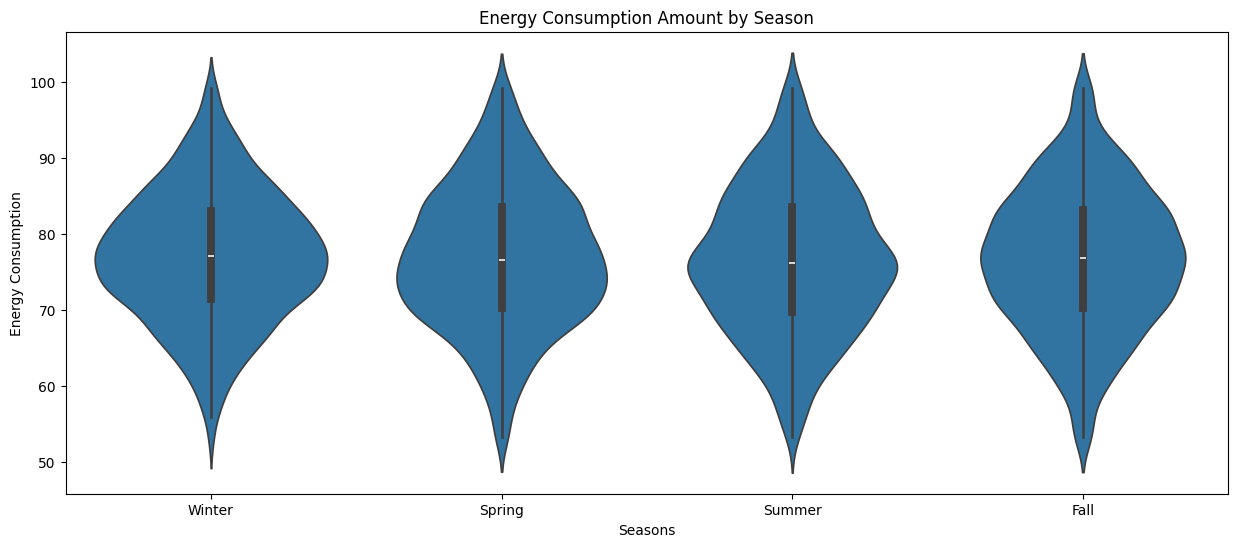

In [39]:
#set the size of the graph
#once again, we want to make the graph wider so we can read everything clearly
plt.figure(figsize=(15, 6))

#grouping months into seasons to make a better insight based on temperature (see if data remains consistent).
energy['Season'] = energy['Month'].replace(1, 'Winter')
energy['Season'] = energy['Season'].replace(2, 'Winter')
energy['Season'] = energy['Season'].replace(3, 'Spring')
energy['Season'] = energy['Season'].replace(4, 'Spring')
energy['Season'] = energy['Season'].replace(5, 'Spring')
energy['Season'] = energy['Season'].replace(6, 'Summer')
energy['Season'] = energy['Season'].replace(7, 'Summer')
energy['Season'] = energy['Season'].replace(8, 'Summer')
energy['Season'] = energy['Season'].replace(9, 'Fall')
energy['Season'] = energy['Season'].replace(10, 'Fall')
energy['Season'] = energy['Season'].replace(11, 'Fall')
energy['Season'] = energy['Season'].replace(12, 'Winter')

#creating a violin plot to measure energy consumption among the seasons
energyBySeason = sns.violinplot(data=energy, x="Season", y="EnergyConsumption")

#Modify the title and the x/y labels
energyBySeason.set(xlabel = 'Seasons', ylabel = 'Energy Consumption', title = 'Energy Consumption Amount by Season')

plt.show()

<br>Insight 9:</b> Typically, more energy is consumed when the HVAC systems are on.

(r7) Split the data by certain categories to explore the numerical distributions<br>
This insight was discovered by splitting the Energy Consumption numerical data into categories based on if the HVAC Systems are being used or not, and creating a boxplot based on these categories. The goal of this graph was to determine if more Energy is typically needed when HVAC is used. The boxplot proved this assumption to be true, because looking at the Q2 line on the plot (aka the Median) of the "On" value, we can see that it is higher up on the y-axis. Its Q1 and Q3 lines are also higher on the y-axis for the "On" value. So, we can assume that areas with HVAC system being on would have a bigger chance of having a higher energy consumption.

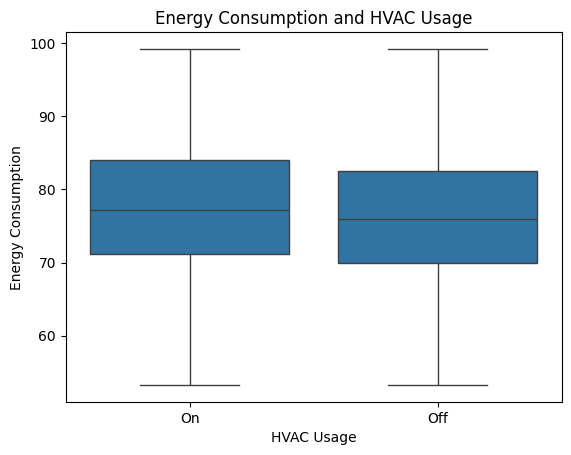

In [40]:
#creating a boxplot to measure energy consumption by HVAC Usage
energyConsumptionHVACUse = sns.boxplot(data=energy, x="HVACUsage", y="EnergyConsumption")

#Modify the title and the x/y labels
energyConsumptionHVACUse.set(xlabel = 'HVAC Usage', ylabel = 'Energy Consumption', title = 'Energy Consumption and HVAC Usage')

plt.show()

<b>Insight 10:</b> The required consumption of energy does not change with the usage of lighting.

(r7) Split the data by certain categories to explore the numerical distributions <br>
This insight was discovered by splitting the Energy Consumption numerical data into categories based on if the Lighting Systems are being used or not, and creating a boxplot based on these categories. The goal was to determine if having the Lighting On would contribute to a higher Energy Consumption. However, looking at this count plot, this does not seem to be the case. The two boxes on the On and Off categories look nearly identical, making it impossible to identify which one has higher quartiles. Therefore it can be determined that the Lighting Usage being On or Off does not have any effect on Energy Consumption.

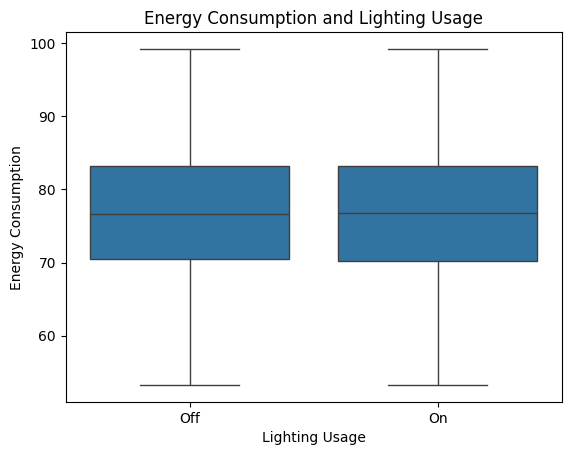

In [41]:
#Creating a boxplot to compare lighting usage to energy consumption
lightingAndEnergy = sns.boxplot(data=energy, x="LightingUsage", y="EnergyConsumption")

#Modify the title and the x/y labels
lightingAndEnergy.set(xlabel = 'Lighting Usage', ylabel = 'Energy Consumption', title = 'Energy Consumption and Lighting Usage')

plt.show()

# CONCLUSION

The goal of analyzing the first data set was to gain insight into the extremes of mobile usage and the impact it has on different phone models. For the second data set, the goal was to study how the different times of the day can affect energy consumption throughout the year.
<br><br>
Key Insights: <br>
Dataset 1: Typically, users are more conservative with their phone usages. They tend more towards low screen time, data usage and battery drain. <br>
Dataset 2: Extreme values (lower or higher) don't contribute much to Energy Consumption. The bulk of its values can be found around the medians.
<br><br>
The findings from the first dataset are useful for its intended audience as it provides mobile phone companies with information as to how their customers use their phones. This would allow these companies to then make changes to their devices and release improvements to target certain age groups or genders. Also, it helps them see how they compare to their competitors in terms of which phone performs better in sales and battery life. It also always phone users become aware of their phone usage behaviours and allows them to decide whether they should change their habits.
<br>
The findings in the second dataset help energy and hydro companies see the total energy consumption throughout the year. This helps them see how external factors (ex. weather influences or if the day is a holiday) and internal factors (ex. large gatherings of people) impact how much energy is consumed.

# REFERENCES

- ChatGPT :
    - To relocate legend to bottom of plot
        ```python
        plt.legend(
            loc='upper center',
            ncol=10,
            bbox_to_anchor=(0.5, -0.15),
            title='Occupancy'
        )
        ```

    - To create category groups
        ```python
        bins = [18, 24, 32, 39, 46, 53, 59]
        labels = ["18-24", "25-31", "32-38", "39-45", "46-52", "53-59"] 
        mobile["AgeGroup"] = pd.cut(mobile["Age"], bins=bins, labels=labels)
        ```
        
- StackOverflow - How to show the x-axis values for each faucet.<br>
https://stackoverflow.com/questions/52182322/repeating-x-axis-labels-for-all-facets-using-facetgrid-in-seaborn

- Seaborn - Used for choosing colour palettes <br>
https://seaborn.pydata.org/tutorial/color_palettes.html


- ChatGPT: example for relocating and renaming a legend <br>
Prompt:<br>
how to rename and relocate a legend in seaborn<br>
Used code:<br>
ax.legend(title="Day of Week", loc="upper left", bbox_to_anchor=(1, 1))
<br><br>
- https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
- https://seaborn.pydata.org/examples/grouped_barplot.html
- https://www.geeksforgeeks.org/types-of-seaborn-plots/
- https://www.geeksforgeeks.org/how-to-set-axes-labels-limits-in-a-seaborn-plot/
- https://www.tutorialspoint.com/how-do-we-adjust-the-size-of-the-plot-in-seaborn